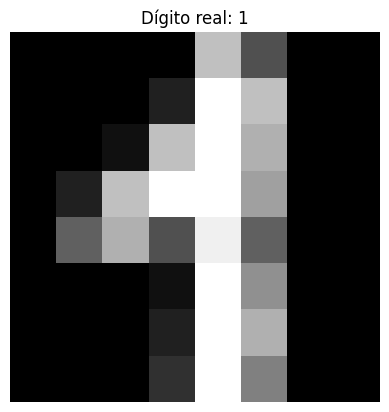

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar el dataset de dígitos
digits = load_digits()

index = 42
image = digits.images[index]   # matriz 8x8
label = digits.target[index]   # etiqueta real

plt.imshow(image, cmap='gray', interpolation='nearest')
plt.title(f"Dígito real: {label}")
plt.axis('off')
plt.show()

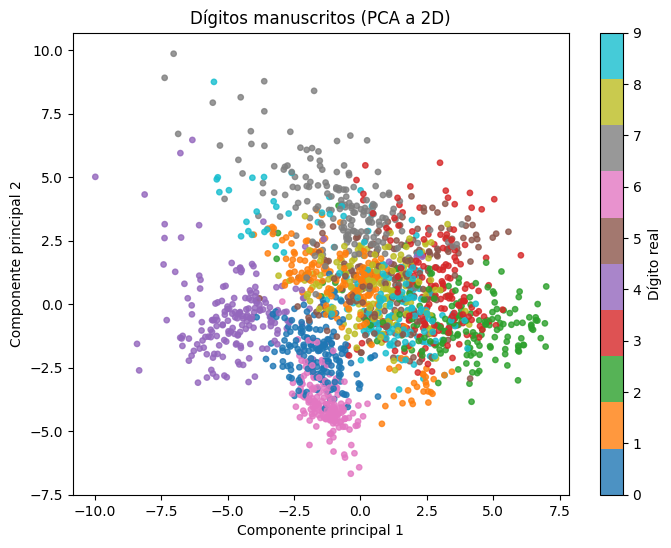

In [2]:
X = digits.data
y = digits.target

# Escalar los datos
X_scaled = StandardScaler().fit_transform(X)

# Reducir a 2D con PCA (para visualizar todo el dataset)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar en 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, cmap="tab10", s=15, alpha=0.8
)
plt.colorbar(scatter, ticks=range(10), label="Dígito real")
plt.title("Dígitos manuscritos (PCA a 2D)", fontsize=12)
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show()

Ahora aplicamos t-SNE sobre 2D y visualizamos:

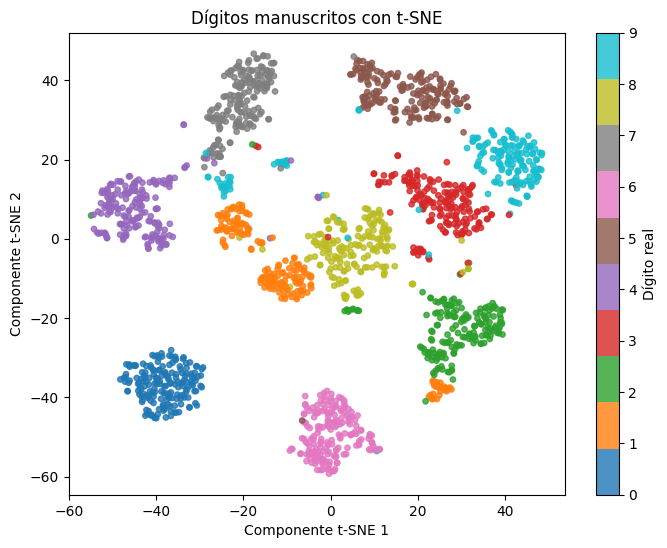

In [3]:
from sklearn.manifold import TSNE

# Aplicar t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    max_iter=1000,
    random_state=42
)
X_embedded = tsne.fit_transform(X_scaled)

# Visualizar los resultados
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_embedded[:, 0], X_embedded[:, 1],
    c=y, cmap='tab10', s=15, alpha=0.8
)
plt.colorbar(scatter, ticks=range(10), label="Dígito real")
plt.title("Dígitos manuscritos con t-SNE", fontsize=12)
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.show()

CREAR CLASIFICADOR: 10 clases
1) Datos tal cual
2) PCA
3) t-SNE